<div class="row">
  <div class="column">
    <img src="./img/logo-onera.png" width="200">
  </div>
  <div class="column">
    <img src="./img/logo-ISAE_SUPAERO.png" width="200">
  </div>
</div>

# FAST-OAD Tutorial

FAST-OAD is a framework for performing rapid Overall Aircraft Design. The computational core of FAST-OAD is based on the  [OpenMDAO framework](https://openmdao.org/).

## 1. Setting up and analyzing the initial problem

To organize our work, we propose to use two user folders `data/` and `workdir/`. For instance, in `data/` we store a XML file which describes the [CeRAS reference case](http://ceras.ilr.rwth-aachen.de/trac/wiki/CeRAS/AircraftDesigns/CSR01). In `workdir/`, we store files generated or modified by FAST-OAD.

In [1]:
import os
import os.path as pth
import openmdao.api as om
from fastoad import api
import logging
from fastoad.utils.postprocessing import VariableViewer
import shutil
from models.register import register_openmdao_systems
register_openmdao_systems()
DATA_FOLDER_PATH = 'data'

WORK_FOLDER_PATH = 'workdir'

CONFIGURATION_FILE = pth.join('./','multirotor.toml')
REF_INPUT_FILE = pth.join('./','problem_inputs_ref.xml')
# For having log messages on screen
logging.basicConfig(level=logging.INFO, format='%(levelname)-8s: %(message)s')

# For using all screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Unable to import mpi4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.


After defining a configuration file name, we can ask FAST-OAD to generate a default configuration file based on the default OAD model implemented in the framework:

In this configuration file, we have specified an input file name 'problem_inputs.xml'. We can ask FAST-OAD to generate the inputs of the default model with the CeRAS parameters as default values:

In [2]:
api.generate_inputs(CONFIGURATION_FILE, REF_INPUT_FILE, overwrite=True)

INFO    : Loading bundles from D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\models
INFO    : Installed bundle models.frame (ID 28 )
INFO    : Installed bundle models.mission (ID 29 )
INFO    : Installed bundle models.propeller (ID 25 )
INFO    : Installed bundle models.multirotor (ID 30 )
INFO    : Installed bundle models.motor (ID 26 )
INFO    : Installed bundle models.register (ID 33 )
INFO    : Installed bundle models.trajectory (ID 31 )
INFO    : Installed bundle models.sizing_scenarios (ID 24 )
INFO    : Installed bundle models.battery_and_esc (ID 27 )
INFO    : Installed bundle models (ID 32 )
INFO    : Problem inputs written in D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\problem_inputs.xml


You can now checkout the generated [input file](./workdir/problem_inputs.xml). As shown previously in the user file architecture, the values in this file can be modified by the user and will be considered by FAST-OAD when executing a computational process.

A useful feature that FAST-OAD provides is to list the outputs of the model defined in the configuration file:

In [ ]:
api.list_variables(CONFIGURATION_FILE)

INFO    : Loading bundles from D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\models
INFO    : Installed bundle models.battery_and_esc (ID 27 )
INFO    : Installed bundle models.frame (ID 28 )
INFO    : Installed bundle models (ID 32 )
INFO    : Installed bundle models.motor (ID 26 )
INFO    : Installed bundle models.mission (ID 29 )
INFO    : Installed bundle models.sizing_scenarios (ID 24 )
INFO    : Installed bundle models.trajectory (ID 31 )
INFO    : Installed bundle models.propeller (ID 25 )
INFO    : Installed bundle models.register (ID 33 )
INFO    : Installed bundle models.multirotor (ID 30 )


Another useful feature is to list the modules of the model defined in the configuration file:

In [4]:
api.list_systems(CONFIGURATION_FILE)

INFO    : Loading bundles from D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\models
INFO    : Installed bundle models.register (ID 32 )
INFO    : Installed bundle models.battery_and_esc (ID 27 )
INFO    : Installed bundle models.frame (ID 28 )
INFO    : Installed bundle models.sizing_scenarios (ID 24 )
INFO    : Installed bundle models (ID 31 )
INFO    : Installed bundle models.mission (ID 29 )
INFO    : Installed bundle models.propeller (ID 25 )
INFO    : Installed bundle models.multirotor (ID 30 )
INFO    : Installed bundle models.motor (ID 26 )
INFO    : Loading bundles from D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\models
INFO    : Installed bundle models.register (ID 32 )
INFO    : Installed bundle models.battery_and_esc (ID 27 )
INFO    : Installed bundle models.frame (ID 28 )
INFO    : Installed bundle models.sizing_scenarios (ID 24 )
INFO    : Installed bundle models (ID 31 )
INFO    : Installed bundle 

== AVAILABLE SYSTEM IDENTIFIERS ====================================================================
----------------------------------------------------------------------------------------------------
  IDENTIFIER:   fastoad.aerodynamics.highspeed.legacy
  PATH:         d:\users\s.delbecq\appdata\local\programs\miniconda3\lib\site-packages\fastoad\models\aerodynamics\aerodynamics_high_speed.py
  DOMAIN:       Aerodynamics
  DESCRIPTION:  
    Computes aerodynamic polar of the aircraft in cruise conditions.

    Drag contributions of each part of the aircraft are computed though analytical
    models.

----------------------------------------------------------------------------------------------------
  IDENTIFIER:   fastoad.aerodynamics.landing.legacy
  PATH:         d:\users\s.delbecq\appdata\local\programs\miniconda3\lib\site-packages\fastoad\models\aerodynamics\aerodynamics_landing.py
  DOMAIN:       Aerodynamics
  DESCRIPTION:  
    Computes aerodynamic characteristics at landing.

Another useful feature is the [N2 diagram](http://openmdao.org/twodocs/versions/latest/basic_guide/make_n2.html) visualization available in OpenMDAO to see the structure of the model:

In [5]:
N2_FILE = pth.join(WORK_FOLDER_PATH, 'n2.html')
api.write_n2(CONFIGURATION_FILE, N2_FILE, overwrite=True)
from IPython.display import IFrame
IFrame(src=N2_FILE, width='100%', height='500px')

INFO    : Loading bundles from D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\models
INFO    : Installed bundle models.register (ID 32 )
INFO    : Installed bundle models.battery_and_esc (ID 27 )
INFO    : Installed bundle models.frame (ID 28 )
INFO    : Installed bundle models.sizing_scenarios (ID 24 )
INFO    : Installed bundle models (ID 31 )
INFO    : Installed bundle models.mission (ID 29 )
INFO    : Installed bundle models.propeller (ID 25 )
INFO    : Installed bundle models.multirotor (ID 30 )
INFO    : Installed bundle models.motor (ID 26 )
d:\users\s.delbecq\appdata\local\programs\miniconda3\lib\site-packages\openmdao\core\group.py:1937: UserWarning:<model> <class Group>: Output 'motor.current_and_voltage.data:motor:power:hover' with units of 'W' is connected to input 'mission.data:motor:power:hover' which has no units.
INFO    : N2 diagram written in D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\workdir\n2

Alternatively, you can create a [WhatsOpt](https://github.com/OneraHub/WhatsOpt-Doc#whatsopt-documentation) account to generate the XDSM of the problem. If your account is created, you may uncomment next lines and run them (this should take ~ 1 min):

In [6]:
# XDSM_FILE = pth.join(WORK_FOLDER_PATH, 'xdsm.html')
# api.write_xdsm(CONFIGURATION_FILE, XDSM_FILE, overwrite=True)
# from IPython.display import IFrame
# IFrame(src=XDSM_FILE, width='100%', height='500px')

## 2. Running your first MDA

### CeRAS
Here we run an MDA, that is solving the multidisciplinary couplings using the different nested solvers in the model, without running the optimization problem even if it is defined in the configuration file.

In [3]:
INPUT_FILE = pth.join('problem_inputs.xml')
api.variable_viewer(INPUT_FILE)

In [2]:
eval_problem = api.evaluate_problem(CONFIGURATION_FILE, overwrite=True)

INFO    : Loading bundles from D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\models
INFO    : Installed bundle models.mission (ID 29 )
INFO    : Installed bundle models (ID 32 )
INFO    : Installed bundle models.propeller (ID 25 )
INFO    : Installed bundle models.multirotor (ID 30 )
INFO    : Installed bundle models.motor (ID 26 )
INFO    : Installed bundle models.trajectory (ID 31 )
INFO    : Installed bundle models.sizing_scenarios (ID 24 )
INFO    : Installed bundle models.register (ID 33 )
INFO    : Installed bundle models.battery_and_esc (ID 27 )
INFO    : Installed bundle models.frame (ID 28 )
INFO    : Computation finished after 0.2 seconds
INFO    : Problem outputs written in D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\problem_outputs.xml


Simulation interval    : 0.0 - 3.9999999999999996 seconds.
Elapsed simulation time: 0.13417659999999998 seconds.


Let's save these results. We will use them in the next workbook, that shows some post-processing utilities.

In [9]:
OUTPUT_FILE = pth.join('problem_outputs.xml')

The `variable-viewer` provides a way to inspect the content of the XML file. The dropdown lists above the table allow to filter the displayed variable.

In [10]:
api.variable_viewer(OUTPUT_FILE)

## 3. Running your first MDO

## CeRAS 2750 nm optimization

As seen earlier, the current aircraft configuration is estimated as unstable. We will fix this using a simple optimization problem that will move wing position so the static margin is at least +5%, while keeping the fuel consumption as low as possible. 

The default configuration file defines this optimization problem that aims at:
- minimizing the fuel consumption for the mission (objective),
- with respect to the wing position (design variables),
- subject to a static margin (constraints).

*(This run should take a few dozen seconds)*

To visualize and edit the optimization problem definition (present in the configuration file .toml) you can use the `optimization_viewer` tool. If design variables or constraints have active bounds they are yellow whereas they are red if they are violated. Modifiying the `Initial Value` will modify the input file defined in the configuration file .toml whereas `Value` corresponds to the value found in the output file defined in the configuration file (here it is the 800 nm MDA run).

In [2]:
api.optimization_viewer(CONFIGURATION_FILE)

In [23]:
optim_problem = api.optimize_problem(CONFIGURATION_FILE, overwrite=True)

INFO    : Loading bundles from D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\models
INFO    : Installed bundle models.mission (ID 29 )
INFO    : Installed bundle models.propeller (ID 25 )
INFO    : Installed bundle models.multirotor (ID 30 )
INFO    : Installed bundle models (ID 32 )
INFO    : Installed bundle models.motor (ID 26 )
INFO    : Installed bundle models.trajectory (ID 31 )
INFO    : Installed bundle models.sizing_scenarios (ID 24 )
INFO    : Installed bundle models.battery_and_esc (ID 27 )
INFO    : Installed bundle models.register (ID 33 )
INFO    : Installed bundle models.frame (ID 28 )


Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.07760860000007597 seconds.
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.09495650000008027 seconds.
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.09756069999980355 seconds.
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.07925580000005539 seconds.
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.08306049999987408 seconds.
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.09609139999997751 seconds.
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.09225409999999101 seconds.
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.08213350000005448 seconds.
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.12151360000007116 seconds.
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.0797703000000638 seconds.
Simulation interval  

Simulation interval    : 0.0 - 2.0001707918085225 seconds.
Elapsed simulation time: 0.08154639999997926 seconds.
Simulation interval    : 0.0 - 2.9650616690928038 seconds.
Elapsed simulation time: 0.08593489999998383 seconds.
Simulation interval    : 0.0 - 2.9650616690928038 seconds.
Elapsed simulation time: 0.08139479999999821 seconds.
Simulation interval    : 0.0 - 2.9650616690928038 seconds.
Elapsed simulation time: 0.08269719999998415 seconds.
Simulation interval    : 0.0 - 2.9650616690928038 seconds.
Elapsed simulation time: 0.08328150000011192 seconds.
Simulation interval    : 0.0 - 2.9650616690928038 seconds.
Elapsed simulation time: 0.08878270000013799 seconds.
Simulation interval    : 0.0 - 2.9650616690928038 seconds.
Elapsed simulation time: 0.0809146999999939 seconds.
Simulation interval    : 0.0 - 2.9650616690928038 seconds.
Elapsed simulation time: 0.08646350000003622 seconds.
Simulation interval    : 0.0 - 2.9650616690928038 seconds.
Elapsed simulation time: 0.08615230000

Simulation interval    : 0.0 - 2.8260885931246453 seconds.
Elapsed simulation time: 0.09593210000002728 seconds.
Simulation interval    : 0.0 - 2.8260885931246453 seconds.
Elapsed simulation time: 0.10713939999982358 seconds.
Simulation interval    : 0.0 - 2.8260885931246453 seconds.
Elapsed simulation time: 0.09573369999998249 seconds.
Simulation interval    : 0.0 - 2.8260885931246453 seconds.
Elapsed simulation time: 0.08471749999989697 seconds.
Simulation interval    : 0.0 - 2.531260935460898 seconds.
Elapsed simulation time: 0.07720790000007582 seconds.
Simulation interval    : 0.0 - 2.531260935460898 seconds.
Elapsed simulation time: 0.08739639999998872 seconds.
Simulation interval    : 0.0 - 2.531260935460898 seconds.
Elapsed simulation time: 0.08384109999997236 seconds.
Simulation interval    : 0.0 - 2.531260935460898 seconds.
Elapsed simulation time: 0.09014380000007804 seconds.
Simulation interval    : 0.0 - 2.531260935460898 seconds.
Elapsed simulation time: 0.080845700000054

Simulation interval    : 0.0 - 2.6264312934520215 seconds.
Elapsed simulation time: 0.08372400000007474 seconds.
Simulation interval    : 0.0 - 2.6264312934520215 seconds.
Elapsed simulation time: 0.08023509999998168 seconds.
Simulation interval    : 0.0 - 2.6264312934520215 seconds.
Elapsed simulation time: 0.07771150000007765 seconds.
Simulation interval    : 0.0 - 2.6264312934520215 seconds.
Elapsed simulation time: 0.08157469999991918 seconds.
Simulation interval    : 0.0 - 2.6264312934520215 seconds.
Elapsed simulation time: 0.09251919999996971 seconds.
Simulation interval    : 0.0 - 2.6264312934520215 seconds.
Elapsed simulation time: 0.1080323999999564 seconds.
Simulation interval    : 0.0 - 2.6264312934520215 seconds.
Elapsed simulation time: 0.0924353999998857 seconds.
Simulation interval    : 0.0 - 2.6264312934520215 seconds.
Elapsed simulation time: 0.08544230000006792 seconds.
Simulation interval    : 0.0 - 2.601293579513962 seconds.
Elapsed simulation time: 0.0841172000000

Simulation interval    : 0.0 - 2.5413648683136487 seconds.
Elapsed simulation time: 0.10135560000003352 seconds.
Simulation interval    : 0.0 - 2.5413648683136487 seconds.
Elapsed simulation time: 0.10328400000003057 seconds.
Simulation interval    : 0.0 - 2.5413648683136487 seconds.
Elapsed simulation time: 0.08946450000007644 seconds.
Simulation interval    : 0.0 - 2.5413648683136487 seconds.
Elapsed simulation time: 0.07930099999998674 seconds.
Simulation interval    : 0.0 - 2.5413648683136487 seconds.
Elapsed simulation time: 0.08309339999982512 seconds.
Simulation interval    : 0.0 - 2.5413648683136487 seconds.
Elapsed simulation time: 0.08222879999993893 seconds.
Simulation interval    : 0.0 - 2.541365868313649 seconds.
Elapsed simulation time: 0.0834009000000151 seconds.
Simulation interval    : 0.0 - 2.5413648683136487 seconds.
Elapsed simulation time: 0.0794556000000739 seconds.
Simulation interval    : 0.0 - 2.5413648683136487 seconds.
Elapsed simulation time: 0.0950001999999

Simulation interval    : 0.0 - 2.571039875495518 seconds.
Elapsed simulation time: 0.081318999999894 seconds.
Simulation interval    : 0.0 - 2.571039875495518 seconds.
Elapsed simulation time: 0.07803550000016912 seconds.
Simulation interval    : 0.0 - 2.571039875495518 seconds.
Elapsed simulation time: 0.0811942000000272 seconds.
Simulation interval    : 0.0 - 2.571039875495518 seconds.
Elapsed simulation time: 0.08280530000001818 seconds.
Simulation interval    : 0.0 - 2.571039875495518 seconds.
Elapsed simulation time: 0.08104230000003554 seconds.
Simulation interval    : 0.0 - 2.571039875495518 seconds.
Elapsed simulation time: 0.0993453999999474 seconds.
Simulation interval    : 0.0 - 2.571039875495518 seconds.
Elapsed simulation time: 0.10336430000006658 seconds.
Simulation interval    : 0.0 - 2.571039875495518 seconds.
Elapsed simulation time: 0.08901839999998629 seconds.
Simulation interval    : 0.0 - 2.571039875495518 seconds.
Elapsed simulation time: 0.08636839999985568 secon

Simulation interval    : 0.0 - 2.5578313485035205 seconds.
Elapsed simulation time: 0.08867699999996148 seconds.
Simulation interval    : 0.0 - 2.5578313485035205 seconds.
Elapsed simulation time: 0.08038269999997283 seconds.
Simulation interval    : 0.0 - 2.5578313485035205 seconds.
Elapsed simulation time: 0.08122840000010001 seconds.
Simulation interval    : 0.0 - 2.5578313485035205 seconds.
Elapsed simulation time: 0.08138689999987037 seconds.
Simulation interval    : 0.0 - 2.5540166384541454 seconds.
Elapsed simulation time: 0.08368359999985842 seconds.
Simulation interval    : 0.0 - 2.5540166384541454 seconds.
Elapsed simulation time: 0.08036040000001776 seconds.
Simulation interval    : 0.0 - 2.5540166384541454 seconds.
Elapsed simulation time: 0.09084740000002967 seconds.
Simulation interval    : 0.0 - 2.5540166384541454 seconds.
Elapsed simulation time: 0.08789150000006885 seconds.
Simulation interval    : 0.0 - 2.5540166384541454 seconds.
Elapsed simulation time: 0.0852712000

Simulation interval    : 0.0 - 2.552252496836963 seconds.
Elapsed simulation time: 0.0876299999999901 seconds.
Simulation interval    : 0.0 - 2.552252496836963 seconds.
Elapsed simulation time: 0.08102819999999156 seconds.
Simulation interval    : 0.0 - 2.552253496836963 seconds.
Elapsed simulation time: 0.07916670000008708 seconds.
Simulation interval    : 0.0 - 2.552252496836963 seconds.
Elapsed simulation time: 0.08338200000002871 seconds.
Simulation interval    : 0.0 - 2.552252496836963 seconds.
Elapsed simulation time: 0.08601290000001427 seconds.
Simulation interval    : 0.0 - 2.552252496836963 seconds.
Elapsed simulation time: 0.08065400000009504 seconds.
Simulation interval    : 0.0 - 2.552252496836963 seconds.
Elapsed simulation time: 0.08423840000000382 seconds.
Simulation interval    : 0.0 - 2.552252496836963 seconds.
Elapsed simulation time: 0.08559669999999642 seconds.
Simulation interval    : 0.0 - 2.552252496836963 seconds.
Elapsed simulation time: 0.0886156999999912 sec

Simulation interval    : 0.0 - 2.552555975004861 seconds.
Elapsed simulation time: 0.08513609999999971 seconds.
Simulation interval    : 0.0 - 2.552555975004861 seconds.
Elapsed simulation time: 0.08704639999996289 seconds.
Simulation interval    : 0.0 - 2.552555975004861 seconds.
Elapsed simulation time: 0.0790850999999293 seconds.
Simulation interval    : 0.0 - 2.552555975004861 seconds.
Elapsed simulation time: 0.087047499999926 seconds.
Simulation interval    : 0.0 - 2.552555975004861 seconds.
Elapsed simulation time: 0.08995989999993981 seconds.
Simulation interval    : 0.0 - 2.552555975004861 seconds.
Elapsed simulation time: 0.07941710000000057 seconds.
Simulation interval    : 0.0 - 2.552555975004861 seconds.
Elapsed simulation time: 0.0828946999999971 seconds.
Simulation interval    : 0.0 - 2.552555975004861 seconds.
Elapsed simulation time: 0.08167789999993147 seconds.
Simulation interval    : 0.0 - 2.5531231557671044 seconds.
Elapsed simulation time: 0.07749939999985145 seco

Simulation interval    : 0.0 - 2.55333834222893 seconds.
Elapsed simulation time: 0.0818498000001 seconds.
Simulation interval    : 0.0 - 2.55333834222893 seconds.
Elapsed simulation time: 0.0829759999999169 seconds.
Simulation interval    : 0.0 - 2.55333834222893 seconds.
Elapsed simulation time: 0.08102640000015526 seconds.
Simulation interval    : 0.0 - 2.55333834222893 seconds.
Elapsed simulation time: 0.08334030000014536 seconds.
Simulation interval    : 0.0 - 2.55333834222893 seconds.
Elapsed simulation time: 0.0846692999998595 seconds.
Simulation interval    : 0.0 - 2.55333834222893 seconds.
Elapsed simulation time: 0.08505719999993744 seconds.
Simulation interval    : 0.0 - 2.55333834222893 seconds.
Elapsed simulation time: 0.09874669999999242 seconds.
Simulation interval    : 0.0 - 2.55333834222893 seconds.
Elapsed simulation time: 0.09546550000004572 seconds.
Simulation interval    : 0.0 - 2.5533393422289308 seconds.
Elapsed simulation time: 0.07918590000008408 seconds.
Simul

Simulation interval    : 0.0 - 2.5532204671296976 seconds.
Elapsed simulation time: 0.08088730000008582 seconds.
Simulation interval    : 0.0 - 2.5532204671296976 seconds.
Elapsed simulation time: 0.07773610000003828 seconds.
Simulation interval    : 0.0 - 2.5532204671296976 seconds.
Elapsed simulation time: 0.07745489999979327 seconds.
Simulation interval    : 0.0 - 2.5532204671296976 seconds.
Elapsed simulation time: 0.0824001999999382 seconds.
Simulation interval    : 0.0 - 2.5532204671296976 seconds.
Elapsed simulation time: 0.10189159999981712 seconds.
Simulation interval    : 0.0 - 2.5532204671296976 seconds.
Elapsed simulation time: 0.1040706000001137 seconds.
Simulation interval    : 0.0 - 2.5532204671296976 seconds.
Elapsed simulation time: 0.08616310000002159 seconds.
Simulation interval    : 0.0 - 2.5532204671296976 seconds.
Elapsed simulation time: 0.08239439999988463 seconds.
Simulation interval    : 0.0 - 2.5532204671296976 seconds.
Elapsed simulation time: 0.088394700000

Simulation interval    : 0.0 - 2.553220467129251 seconds.
Elapsed simulation time: 0.08237319999989268 seconds.
Simulation interval    : 0.0 - 2.553220467129251 seconds.
Elapsed simulation time: 0.08300339999982498 seconds.
Simulation interval    : 0.0 - 2.553220467129251 seconds.
Elapsed simulation time: 0.07714489999989382 seconds.
Simulation interval    : 0.0 - 2.553220467129251 seconds.
Elapsed simulation time: 0.08098419999987527 seconds.
Simulation interval    : 0.0 - 2.553220467129251 seconds.
Elapsed simulation time: 0.11077270000009776 seconds.
Simulation interval    : 0.0 - 2.553220467129251 seconds.
Elapsed simulation time: 0.10734440000010181 seconds.
Simulation interval    : 0.0 - 2.553220467129251 seconds.
Elapsed simulation time: 0.11221409999984644 seconds.
Simulation interval    : 0.0 - 2.553220467129251 seconds.
Elapsed simulation time: 0.08852000000001681 seconds.
Simulation interval    : 0.0 - 2.553220467129251 seconds.
Elapsed simulation time: 0.0808062000000973 se

Simulation interval    : 0.0 - 2.546541949736382 seconds.
Elapsed simulation time: 0.10145549999992909 seconds.
Simulation interval    : 0.0 - 2.552522974438404 seconds.
Elapsed simulation time: 0.09922050000000127 seconds.
Simulation interval    : 0.0 - 2.553059657784552 seconds.
Elapsed simulation time: 0.1038851999999224 seconds.
Simulation interval    : 0.0 - 2.5531682819232566 seconds.
Elapsed simulation time: 0.09271459999990839 seconds.
Simulation interval    : 0.0 - 2.55319307928221 seconds.
Elapsed simulation time: 0.08397570000011001 seconds.
Simulation interval    : 0.0 - 2.5531988907272574 seconds.
Elapsed simulation time: 0.0829455999999027 seconds.
Simulation interval    : 0.0 - 2.5532002610035773 seconds.
Elapsed simulation time: 0.09557139999992614 seconds.
Simulation interval    : 0.0 - 2.5532005845632324 seconds.
Elapsed simulation time: 0.08275770000000193 seconds.
Simulation interval    : 0.0 - 2.5532006609902966 seconds.
Elapsed simulation time: 0.1310859000000164 

Simulation interval    : 0.0 - 2.55279287090875 seconds.
Elapsed simulation time: 0.07658949999995457 seconds.
Simulation interval    : 0.0 - 2.5531599020687343 seconds.
Elapsed simulation time: 0.07897030000003724 seconds.
Simulation interval    : 0.0 - 2.5531966051847323 seconds.
Elapsed simulation time: 0.07932259999984126 seconds.
Simulation interval    : 0.0 - 2.5532002754963328 seconds.
Elapsed simulation time: 0.07757879999985562 seconds.
Simulation interval    : 0.0 - 2.553200642527492 seconds.
Elapsed simulation time: 0.07926689999999326 seconds.
Simulation interval    : 0.0 - 2.553200679230608 seconds.
Elapsed simulation time: 0.0779454999999416 seconds.
Simulation interval    : 0.0 - 2.55320068290092 seconds.
Elapsed simulation time: 0.08930339999983516 seconds.
Simulation interval    : 0.0 - 2.553200683267951 seconds.
Elapsed simulation time: 0.09395880000010948 seconds.
Simulation interval    : 0.0 - 2.5532006833046537 seconds.
Elapsed simulation time: 0.08485380000001896 

Simulation interval    : 0.0 - 2.5931651438636956 seconds.
Elapsed simulation time: 0.08238879999998971 seconds.
Simulation interval    : 0.0 - 2.5931651438636956 seconds.
Elapsed simulation time: 0.08000440000000708 seconds.
Simulation interval    : 0.0 - 2.5931651438636956 seconds.
Elapsed simulation time: 0.08506150000016532 seconds.
Simulation interval    : 0.0 - 2.5931651438636956 seconds.
Elapsed simulation time: 0.08404030000019702 seconds.
Simulation interval    : 0.0 - 2.5931651438636956 seconds.
Elapsed simulation time: 0.07819070000005013 seconds.
Simulation interval    : 0.0 - 2.5931651438636956 seconds.
Elapsed simulation time: 0.07939040000019304 seconds.
Simulation interval    : 0.0 - 2.5931651438636956 seconds.
Elapsed simulation time: 0.08203800000001138 seconds.
Simulation interval    : 0.0 - 2.5931651438636956 seconds.
Elapsed simulation time: 0.07832830000006652 seconds.
Simulation interval    : 0.0 - 2.5931651438636956 seconds.
Elapsed simulation time: 0.0783633000

Simulation interval    : 0.0 - 2.5911527547984936 seconds.
Elapsed simulation time: 0.08483839999985321 seconds.
Simulation interval    : 0.0 - 2.5911537547984937 seconds.
Elapsed simulation time: 0.0902074000000539 seconds.
Simulation interval    : 0.0 - 2.5911527547984936 seconds.
Elapsed simulation time: 0.0842609999999695 seconds.
Simulation interval    : 0.0 - 2.5911527547984936 seconds.
Elapsed simulation time: 0.07908179999981257 seconds.
Simulation interval    : 0.0 - 2.5911527547984936 seconds.
Elapsed simulation time: 0.07920919999992293 seconds.
Simulation interval    : 0.0 - 2.5911527547984936 seconds.
Elapsed simulation time: 0.0782342999998491 seconds.
Simulation interval    : 0.0 - 2.5911527547984936 seconds.
Elapsed simulation time: 0.07923469999991539 seconds.
Simulation interval    : 0.0 - 2.5911527547984936 seconds.
Elapsed simulation time: 0.07889610000006542 seconds.
Simulation interval    : 0.0 - 2.5911527547984936 seconds.
Elapsed simulation time: 0.0790485999998

Simulation interval    : 0.0 - 2.5917639134005883 seconds.
Elapsed simulation time: 0.08403290000001107 seconds.
Simulation interval    : 0.0 - 2.5917639134005883 seconds.
Elapsed simulation time: 0.07979649999992944 seconds.
Simulation interval    : 0.0 - 2.5917639134005883 seconds.
Elapsed simulation time: 0.07924649999995381 seconds.
Simulation interval    : 0.0 - 2.5917639134005883 seconds.
Elapsed simulation time: 0.08258829999999762 seconds.
Simulation interval    : 0.0 - 2.5917639134005883 seconds.
Elapsed simulation time: 0.08439469999984794 seconds.
Simulation interval    : 0.0 - 2.5917639134005883 seconds.
Elapsed simulation time: 0.07940380000013647 seconds.
Simulation interval    : 0.0 - 2.5917639134005883 seconds.
Elapsed simulation time: 0.08772619999990638 seconds.
Simulation interval    : 0.0 - 2.5917639134005883 seconds.
Elapsed simulation time: 0.08346290000008594 seconds.
Simulation interval    : 0.0 - 2.5917639134005883 seconds.
Elapsed simulation time: 0.0791397000

Simulation interval    : 0.0 - 2.594038196713199 seconds.
Elapsed simulation time: 0.07959040000014284 seconds.
Simulation interval    : 0.0 - 2.594038196713199 seconds.
Elapsed simulation time: 0.0767203000000336 seconds.
Simulation interval    : 0.0 - 2.594038196713199 seconds.
Elapsed simulation time: 0.07782079999992675 seconds.
Simulation interval    : 0.0 - 2.594038196713199 seconds.
Elapsed simulation time: 0.08468109999989792 seconds.
Simulation interval    : 0.0 - 2.5940689959649137 seconds.
Elapsed simulation time: 0.07787129999996978 seconds.
Simulation interval    : 0.0 - 2.5940689959649137 seconds.
Elapsed simulation time: 0.08693059999995967 seconds.
Simulation interval    : 0.0 - 2.5940689959649137 seconds.
Elapsed simulation time: 0.0773788000001332 seconds.
Simulation interval    : 0.0 - 2.5940689959649137 seconds.
Elapsed simulation time: 0.07841240000016114 seconds.
Simulation interval    : 0.0 - 2.5940689959649137 seconds.
Elapsed simulation time: 0.0890993999998954

Simulation interval    : 0.0 - 2.592445189787613 seconds.
Elapsed simulation time: 0.08416280000005827 seconds.
Simulation interval    : 0.0 - 2.592445189787613 seconds.
Elapsed simulation time: 0.07914949999985765 seconds.
Simulation interval    : 0.0 - 2.592445189787613 seconds.
Elapsed simulation time: 0.080657599999995 seconds.
Simulation interval    : 0.0 - 2.592445189787613 seconds.
Elapsed simulation time: 0.0807972999998583 seconds.
Simulation interval    : 0.0 - 2.592445189787613 seconds.
Elapsed simulation time: 0.08073620000004667 seconds.
Simulation interval    : 0.0 - 2.592445189787613 seconds.
Elapsed simulation time: 0.08020859999987806 seconds.
Simulation interval    : 0.0 - 2.592445189787613 seconds.
Elapsed simulation time: 0.08299099999999271 seconds.
Simulation interval    : 0.0 - 2.592445189787613 seconds.
Elapsed simulation time: 0.07878790000017943 seconds.
Simulation interval    : 0.0 - 2.592445189787613 seconds.
Elapsed simulation time: 0.08147549999989678 seco

ERROR   : Optimization failed after 121.51 seconds



            Iterations: 51
            Function evaluations: 168
            Gradient evaluations: 47
Optimization FAILED.
Positive directional derivative for linesearch
-----------------------------------


INFO    : Problem outputs written in D:\s.delbecq\Documents\6-Repositories\multirotor_trajectory_optimization\openmdao\problem_outputs.xml


Let's save these results:

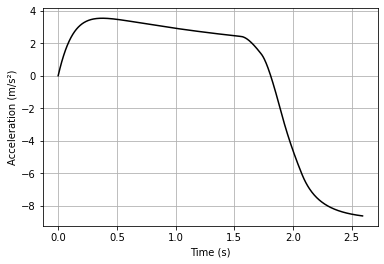

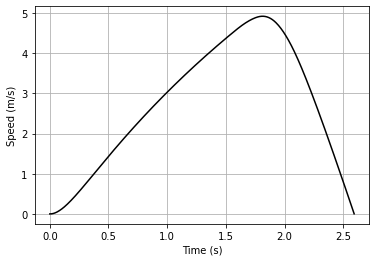

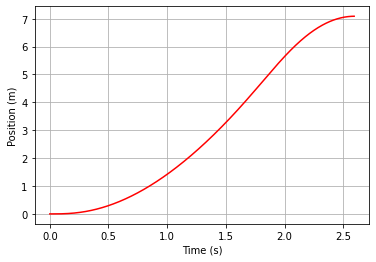

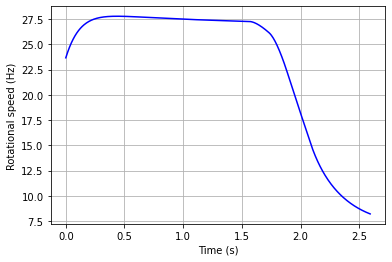

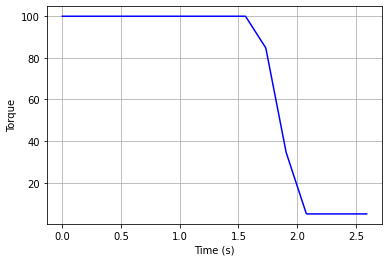

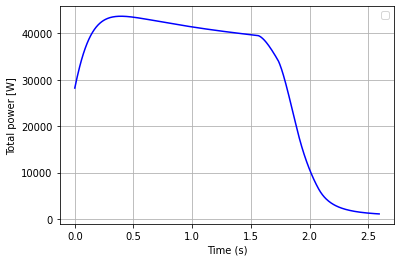

In [24]:
from models.trajectory import plot_trajectory
plot_trajectory(optim_problem.model.trajectory.trajectory.res)

In [21]:
OUTPUT_FILE = pth.join('problem_outputs.xml')

The `optimizer_viewer` offers a convenient summary of the optimization result:

In [25]:
api.optimization_viewer(CONFIGURATION_FILE)

You can use the `VariableViewer` tool to see the optimization results for all variables of the system by loading the .xml output file:

In [16]:
RESULT_FILE = pth.join('problem_outputs.xml')

In [17]:
api.variable_viewer(RESULT_FILE)

In [18]:
16098750 - 15840000

258750

In [2]:
import openmdao.api as om
from models.multirotor import Multirotor
prob = om.Problem()
prob.model = Multirotor()

prob.setup(check=True)

d:\users\s.delbecq\appdata\local\programs\miniconda3\lib\site-packages\openmdao\core\group.py:1949: UserWarning:<model> <class Multirotor>: Input 'mission.data:mission:travel:energy' with units of 'J' is connected to output 'trajectory.trajectory.data:mission:travel:energy' which has no units.
